# Gaussian Process regression
A gaussian process is a kernel-based prediction system which has the useful property that it predicts an uncertainty associated with each prediction. The parameters of the kernel are fit to the data.

In [3]:
from ipp_toolkit.predictors.uncertain_predictors import GaussianProcessRegression
from ipp_toolkit.data.domain_data import SafeForestGMapGreennessRegressionData
from ipp_toolkit.predictors.masked_image_predictor import (
    UncertainMaskedLabeledImagePredictor,
)
from ipp_toolkit.planners.masked_planner import RandomMaskedPlanner
from ipp_toolkit.visualization.visualization import visualize_prediction


Here we fit the GP to some randomly sampled point. Then, we visualize the predictions, along with the uncertainty and error compared to the ground truth.

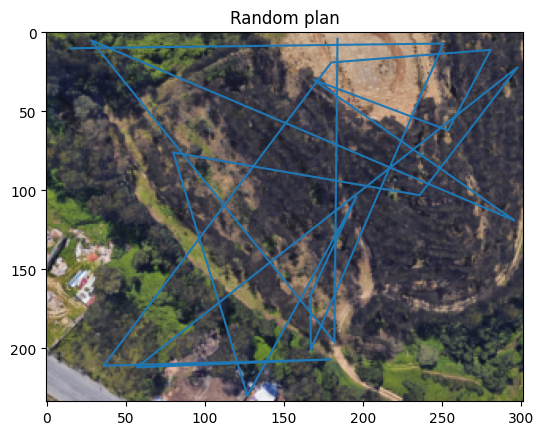

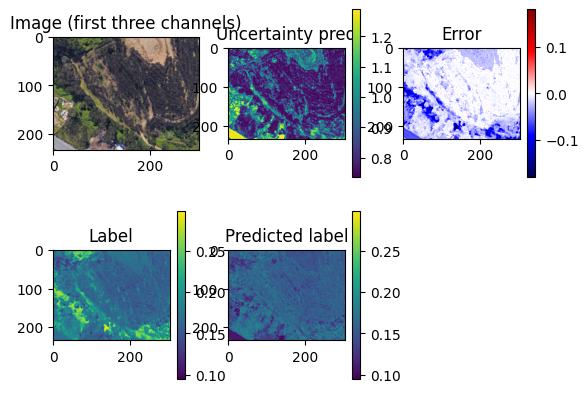

In [4]:
data = SafeForestGMapGreennessRegressionData()
planner = RandomMaskedPlanner(data)
gp = GaussianProcessRegression()
predictor = UncertainMaskedLabeledImagePredictor(
    data, gp, classification_task=data.is_classification_dataset()
)

plan = planner.plan(20, vis=True)
values = data.sample_batch(plan)
predictor.update_model(plan, values)
prediction = predictor.predict_values_and_uncertainty()

visualize_prediction(data, prediction=prediction, predictor=predictor)
